In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Thesis/Dataset/RAW/dataset_halfSecondWindow.csv')
df1


,id,time,activityrecognition#0,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#min,...,sound#mean,sound#min,sound#max,sound#std,speed#mean,speed#min,speed#max,speed#std,target,user
0,156661,3,NaN,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.436463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
1,156662,4,NaN,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.376494,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
2,156663,5,NaN,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.585485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
3,156664,6,NaN,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.693072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
4,156665,7,NaN,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.684707,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,82695,4066,NaN,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.834765,...,89.761985,89.761985,89.761985,NaN,0.00,0.00,0.00,NaN,Walking,U1
62581,77608,604,NaN,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.965309,...,89.747010,89.747010,89.747010,NaN,1.50,1.50,1.50,NaN,Walking,U1
62582,85219,1341,NaN,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.773370,...,89.729460,89.729460,89.729460,NaN,0.00,0.00,0.00,NaN,Walking,U1
62583,69368,1186,NaN,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.789832,...,89.778343,89.778343,89.778343,NaN,1.00,1.00,1.00,NaN,Walking,U1


In [ ]:
column_lst1 = list(df1.columns)
mostly_null1 = []
partially_null1 = []
no_null1 = []

In [ ]:
for i in column_lst1:
    percentage1 = (df1[i].isnull().sum()*100)/62585
    if percentage1 >= 60:
        mostly_null1.append(i)
    elif df1[i].isnull().sum() > 0:
        partially_null1.append(i)
    elif df1[i].isnull().sum() == 0:
        no_null1.append(i)

    print('Feature Name:',i)
    print("Number of missing values: ",df1[i].isnull().sum(),"out of 62585")
    print("Missing percentage:"+str(percentage1)+"%")
    print()

Feature Name: id
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: time
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: activityrecognition#0
Number of missing values:  62585 out of 62585
Missing percentage:100.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  2 out of 62585
Missing percentage:0.003195653910681473%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  8585 out of 62585
Missing percentage:13.717344411600223%

Feat

In [ ]:
if len(mostly_null1)+len(partially_null1)+len(no_null1) == len(column_lst1):
    print("True")
else:
    print("False")

True


In [ ]:
mostly_null1

['activityrecognition#0',
 'android.sensor.light#std',
 'android.sensor.pressure#mean',
 'android.sensor.pressure#min',
 'android.sensor.pressure#max',
 'android.sensor.pressure#std',
 'android.sensor.proximity#mean',
 'android.sensor.proximity#min',
 'android.sensor.proximity#max',
 'android.sensor.proximity#std',
 'android.sensor.step_counter#mean',
 'android.sensor.step_counter#min',
 'android.sensor.step_counter#max',
 'android.sensor.step_counter#std',
 'sound#std',
 'speed#std']

In [ ]:
for i in mostly_null1:
    df1 = df1.drop([i], axis = 1)

In [ ]:
df1 = df1.drop(['id'], axis = 1)

In [ ]:
for i in partially_null1:
    df1[i] = df1[i].fillna(0)

In [ ]:
newcolumns1 = list(df1.columns)

In [ ]:
for i in newcolumns1:
    
    print('Feature Name:',i)
    print("Number of missing values: ",df1[i].isnull().sum(),"out of 62585")
    print("Missing percentage:"+str(percentage1)+"%")
    print()

Feature Name: time
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: activityrecognition#1
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#max
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.accelerometer#std
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#mean
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#min
Number of missing values:  0 out of 62585
Missing percentage:0.0%

Feature Name: android.sensor.game_rotation_vector#max
Number of missing values:  0 out of 62585
Missing percent

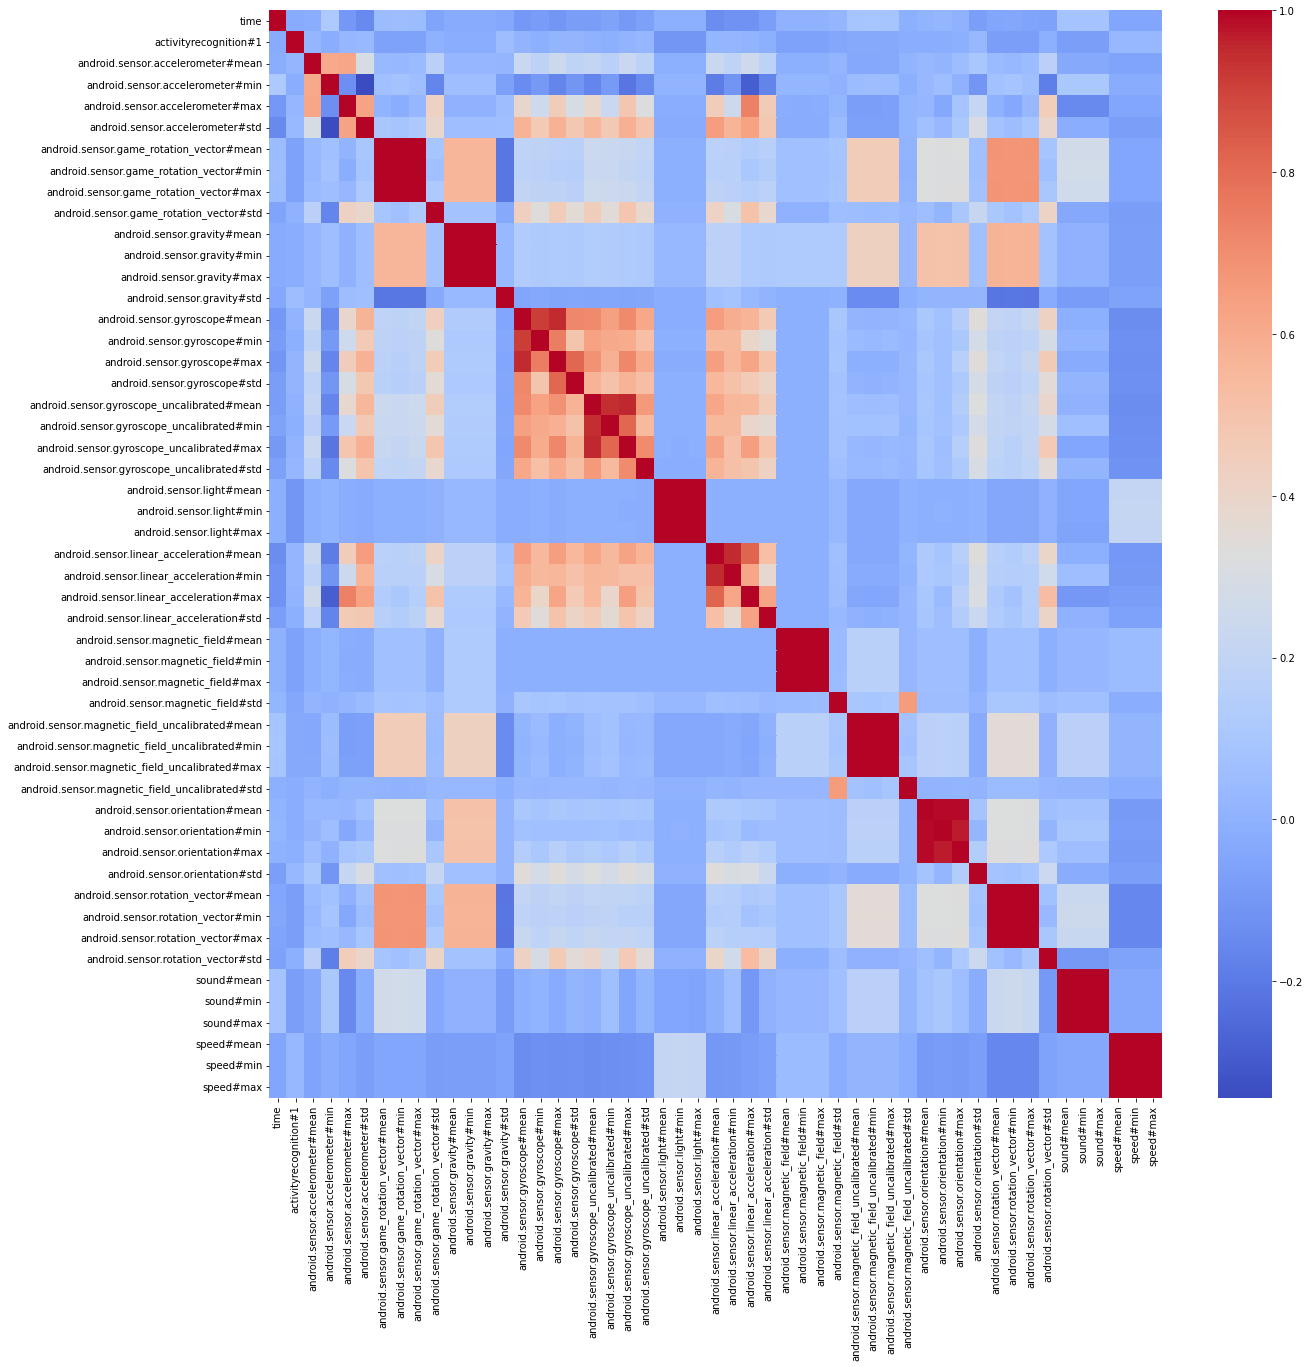

In [ ]:
corr = df1.corr()

plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [ ]:
corr_features = correlation(df1, 0.7)
len(set(corr_features))

27

In [ ]:
df1 = df1.drop(corr_features,axis=1)
df1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean,target,user
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00,Bus,U12
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00,Bus,U12
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00,Bus,U12
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00,Bus,U12
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00,Bus,U12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00,Walking,U1
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50,Walking,U1
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00,Walking,U1
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00,Walking,U1


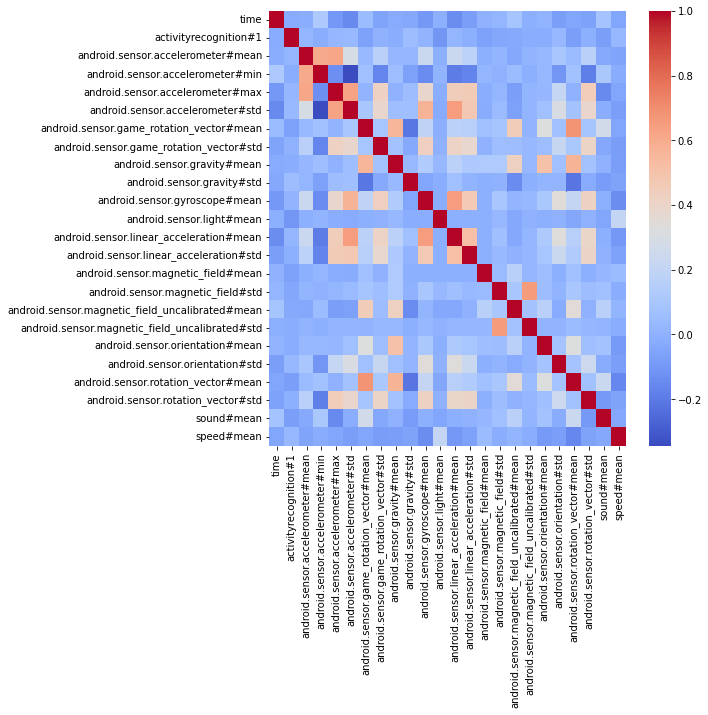

In [ ]:
corr = df1.corr()

plt.figure(figsize=(8,8))  
sns.heatmap(corr, annot = False, cmap = 'coolwarm')

In [ ]:
df1['target'] = df1['target'].map({'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}) 

In [ ]:
df1 = df1.drop(['user'], axis = 1)
df1

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean,target
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,0.655650,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00,0
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,0.890534,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00,0
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,0.706742,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00,0
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,0.116360,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00,0
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,0.239648,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,0.407428,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00,4
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,0.572358,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50,4
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,0.352223,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00,4
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,3.812070,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00,4


In [ ]:
X = df1.iloc[:,0:24] 
y = df1.iloc[:,24]

In [ ]:
X

,time,activityrecognition#1,android.sensor.accelerometer#mean,android.sensor.accelerometer#min,android.sensor.accelerometer#max,android.sensor.accelerometer#std,android.sensor.game_rotation_vector#mean,android.sensor.game_rotation_vector#std,android.sensor.gravity#mean,android.sensor.gravity#std,...,android.sensor.magnetic_field#mean,android.sensor.magnetic_field#std,android.sensor.magnetic_field_uncalibrated#mean,android.sensor.magnetic_field_uncalibrated#std,android.sensor.orientation#mean,android.sensor.orientation#std,android.sensor.rotation_vector#mean,android.sensor.rotation_vector#std,sound#mean,speed#mean
0,3,62,10.053802,4.328630,14.419712,2.359507,0.629076,0.114439,9.806645,3.800000e-06,...,26.294306,0.655650,38.660465,3.515975,69.212414,20.480671,0.551880,0.137706,0.000000,0.00
1,4,62,10.687402,6.373194,16.329818,2.912315,0.577839,0.079211,9.806640,4.620000e-06,...,26.295125,0.890534,61.175710,6.865865,147.052105,18.099960,0.943359,0.046025,0.000000,0.00
2,5,62,11.816800,4.817410,16.854629,3.199759,0.651511,0.033566,9.806636,6.110000e-06,...,27.048843,0.706742,72.826001,0.620963,138.203285,14.463783,0.943879,0.026574,0.000000,0.00
3,6,62,9.401312,6.124588,12.230792,1.572354,0.713226,0.014745,9.806635,5.950000e-06,...,25.878591,0.116360,69.046004,2.365450,147.486429,20.478035,0.911758,0.014528,0.000000,0.00
4,7,62,10.389851,5.313790,38.533453,5.426978,0.707375,0.018754,9.806633,5.620000e-06,...,25.599663,0.239648,69.424097,3.585474,142.051738,23.746712,0.926211,0.021917,0.000000,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62580,4066,51,10.105329,10.089159,10.135641,0.026270,0.834765,0.000162,9.806650,9.030000e-08,...,47.952133,0.407428,79.829254,0.175239,356.129645,0.098269,0.837442,0.000220,89.761985,0.00
62581,604,100,9.544118,9.544118,9.544118,14.491194,0.965309,0.012192,9.806650,1.880000e-08,...,39.067852,0.572358,177.278007,0.453734,197.447131,5.171732,0.980068,0.002820,89.747010,1.50
62582,1341,100,14.258467,14.258467,14.258467,0.829544,0.773370,0.014168,9.806650,1.420000e-07,...,44.275992,0.352223,160.922798,0.052567,208.464276,36.220598,0.978259,0.000834,89.729460,0.00
62583,1186,90,10.726491,10.726491,10.726491,7.089701,0.789832,0.005423,9.806650,1.440000e-07,...,59.172471,3.812070,119.849556,3.641726,122.660341,1.452735,0.787902,0.012880,89.778343,1.00


In [ ]:
y

0        0
1        0
2        0
3        0
4        0
        ..
62580    4
62581    4
62582    4
62583    4
62584    4
Name: target, Length: 62585, dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler   #min max scaling

scaler = MinMaxScaler(feature_range=(0,1))

scaler.fit(X)

X_scaled = scaler.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(X_scaled,y,test_size=0.2)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
def classification_check(model,X,y,x_train, x_test, y_train, y_test):                     
    #x_train, x_test, y_train, y_test =train_test_split(X,y,test_size=0.2)
    model1 = model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test,y_test))
    score=cross_val_score(model,X,y,cv=5)
    print(score)
    print('CV Score:',np.mean(score))
    y_pred1=model1.predict(x_test)
    cf=classification_report(y_test,y_pred1)
    print(cf)


In [ ]:
def plot_confusion_matrix(model, X_test, y_test):
    '''Function to plot confusion matrix for the passed model and the data'''
    
    sentiment_classes = ['Bus', 'Car', 'Still', 'Train', 'Walking']    #{'Bus':0,'Car':1,'Still':2,'Train':3,'Walking':4}
    # use model to do the prediction
    y_pred = model.predict(X_test)
    # compute confusion matrix
    cm = confusion_matrix(np.array(y_test), y_pred)
    # plot confusion matrix
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, cmap=plt.cm.Blues, annot=True, fmt='d', 
                xticklabels=sentiment_classes,
                yticklabels=sentiment_classes)
    plt.title('Confusion matrix', fontsize=16)
    plt.xlabel('Actual label', fontsize=12)
    plt.ylabel('Predicted label', fontsize=12)
    

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classification_check(model,X,y,x_train, x_test, y_train, y_test)

Accuracy: 0.9801869457537749
[0.48949429 0.72677159 0.77159064 0.84828633 0.79443956]
CV Score: 0.7261164815850444
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2459
           1       0.98      0.97      0.98      2498
           2       0.98      0.99      0.99      2512
           3       0.98      0.98      0.98      2489
           4       0.98      0.97      0.98      2559

    accuracy                           0.98     12517
   macro avg       0.98      0.98      0.98     12517
weighted avg       0.98      0.98      0.98     12517



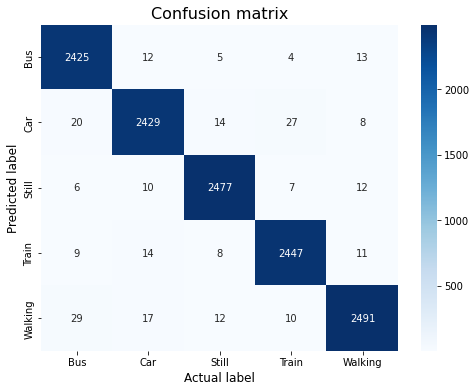

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classification_check(model,X,y,x_train, x_test, y_train, y_test)

Accuracy: 0.9950467364384438
[0.50914756 0.78133738 0.84493089 0.89917712 0.86074938]
CV Score: 0.7790684668850363
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2459
           1       1.00      0.99      0.99      2498
           2       1.00      0.99      1.00      2512
           3       1.00      1.00      1.00      2489
           4       0.99      1.00      0.99      2559

    accuracy                           1.00     12517
   macro avg       1.00      1.00      1.00     12517
weighted avg       1.00      1.00      1.00     12517



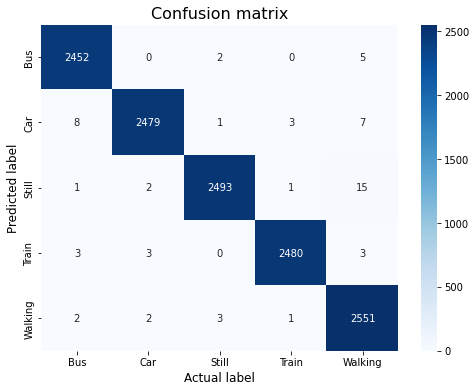

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

Accuracy: 0.9606934568986178
[0.58144923 0.78892706 0.80778142 0.91084126 0.77510586]
CV Score: 0.772820963489654
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2459
           1       0.96      0.94      0.95      2498
           2       0.97      0.97      0.97      2512
           3       0.96      0.96      0.96      2489
           4       0.96      0.97      0.97      2559

    accuracy                           0.96     12517
   macro avg       0.96      0.96      0.96     12517
weighted avg       0.96      0.96      0.96     12517



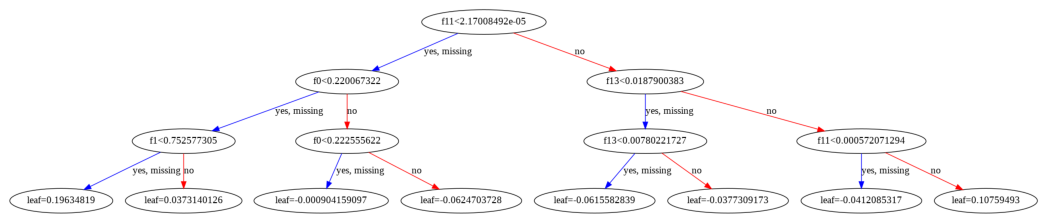

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_tree
model = XGBClassifier()
classification_check(model,X,y,x_train, x_test, y_train, y_test)
plot_tree(model)
plt.gcf().set_size_inches(18.5, 10.5)
plt.show()

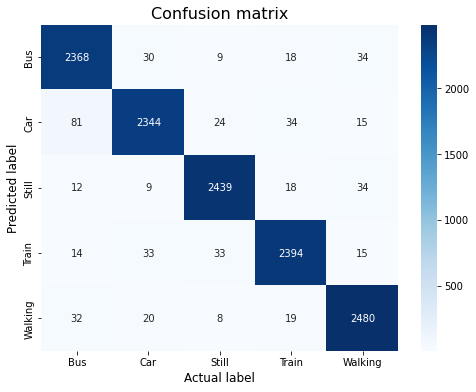

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
from sklearn import svm
model = svm.SVC()
classification_check(model,X,y,x_train, x_test, y_train, y_test)

Accuracy: 0.8592314452344811
[0.35471758 0.3093393  0.37253335 0.34608932 0.32619637]
CV Score: 0.3417751857473835
              precision    recall  f1-score   support

           0       0.76      0.90      0.82      2459
           1       0.91      0.83      0.87      2498
           2       0.87      0.86      0.86      2512
           3       0.83      0.78      0.81      2489
           4       0.94      0.93      0.94      2559

    accuracy                           0.86     12517
   macro avg       0.86      0.86      0.86     12517
weighted avg       0.86      0.86      0.86     12517



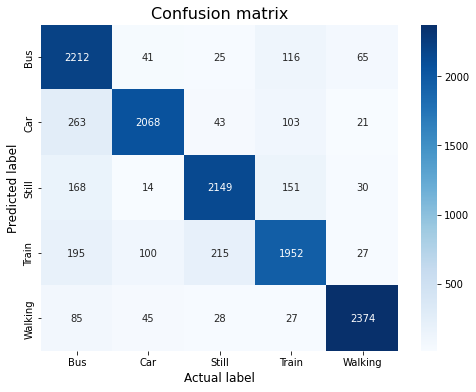

In [ ]:
plot_confusion_matrix(model, x_test, y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 5)
classification_check(model,X,y,x_train, x_test, y_train, y_test)

Accuracy: 0.9831429256211552
[0.36374531 0.63098186 0.61787968 0.80210913 0.75752976]
CV Score: 0.6344491491571463
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2459
           1       0.98      0.98      0.98      2498
           2       0.99      0.98      0.99      2512
           3       0.99      0.99      0.99      2489
           4       0.98      0.97      0.98      2559

    accuracy                           0.98     12517
   macro avg       0.98      0.98      0.98     12517
weighted avg       0.98      0.98      0.98     12517



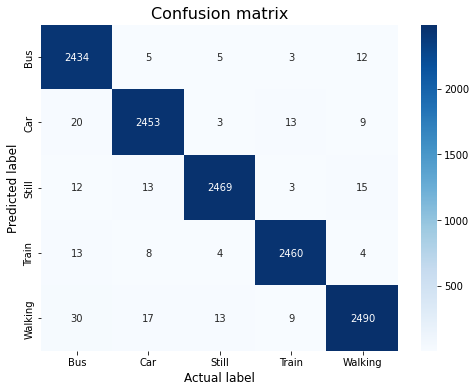

In [ ]:
plot_confusion_matrix(model, x_test, y_test)